**Import Libraries**

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

**1.1. Load Data And Convert Data to Data Frame**

In [2]:
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

**1.2. Showing First Rows of Dataset**

In [3]:
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

**2.1. Split The Data Into Features (X) And Target Labels (y)**

In [4]:
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1066)

**2.2. Normalize Data with StandardScaler**

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-8.959866e-16,3.287236e-15,1.873959e-15,-5.402272e-16,3.825999e-16,7.417754e-17,-2.479091e-16,6.627177e-16,-7.718368e-15,-1.916904e-15,...,-3.591754e-15,-5.543795e-16,-1.637762e-15,6.031805e-16,1.770501e-15,4.860581e-16,1.522592e-16,4.001683e-16,3.825999e-16,7.359193e-15
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,...,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-1.968966e+00,-2.217005e+00,-1.927386e+00,-1.399885e+00,-3.081015e+00,-1.608037e+00,-1.084952e+00,-1.234429e+00,-2.738136e+00,-1.855460e+00,...,-1.676955e+00,-2.183806e+00,-1.644543e+00,-1.180842e+00,-2.626733e+00,-1.412902e+00,-1.255315e+00,-1.704971e+00,-2.204231e+00,-1.614369e+00
25%,-6.680682e-01,-7.185328e-01,-6.783512e-01,-6.477367e-01,-6.994505e-01,-7.565030e-01,-7.190510e-01,-7.341906e-01,-6.971003e-01,-6.752996e-01,...,-6.691548e-01,-7.561282e-01,-6.660416e-01,-6.216285e-01,-7.080753e-01,-6.846683e-01,-7.365941e-01,-7.551735e-01,-6.478465e-01,-6.943581e-01
50%,-2.231129e-01,-1.216934e-01,-2.278997e-01,-2.950753e-01,-2.575553e-02,-2.181810e-01,-3.496557e-01,-3.927129e-01,-5.824692e-02,-1.817260e-01,...,-2.826433e-01,-6.547117e-02,-2.864479e-01,-3.548119e-01,-6.318490e-02,-2.570320e-01,-2.623080e-01,-2.267143e-01,-1.440171e-01,-2.235701e-01
75%,4.730949e-01,5.864016e-01,4.883386e-01,3.234449e-01,6.592265e-01,4.835975e-01,4.456672e-01,5.440522e-01,5.586401e-01,5.034368e-01,...,4.719254e-01,6.083991e-01,5.261661e-01,2.773276e-01,5.881977e-01,4.557995e-01,5.150722e-01,6.852978e-01,4.836913e-01,4.480240e-01
max,3.962556e+00,4.636797e+00,3.971694e+00,5.190675e+00,4.733141e+00,3.948724e+00,4.241328e+00,3.976440e+00,3.423412e+00,4.667118e+00,...,4.086884e+00,3.814679e+00,4.282255e+00,5.875534e+00,3.927345e+00,5.040524e+00,4.600761e+00,2.719763e+00,4.794509e+00,6.925350e+00


In [6]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)
X_test_scaled_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.185697,0.016908,0.182803,0.148437,0.019430,0.043223,0.115923,0.162343,0.067770,-0.133769,...,0.164517,-0.001830,0.167488,0.125461,0.109898,0.041036,0.088909,0.187909,0.084195,0.023599
std,0.930168,0.984222,0.937246,0.905922,0.959679,1.023944,0.968353,1.014226,1.016397,1.021371,...,0.942579,0.909329,0.946502,0.928217,0.934070,0.921973,0.868000,0.982990,1.134593,1.057111
min,-1.758981,-1.943502,-1.756581,-1.301202,-1.605235,-1.331170,-1.084952,-1.234429,-1.665448,-1.787087,...,-1.441768,-1.851267,-1.445006,-1.071930,-1.909562,-1.294567,-1.255315,-1.704971,-1.502527,-1.352229
25%,-0.432256,-0.728384,-0.414399,-0.468541,-0.753240,-0.697942,-0.698117,-0.600876,-0.546997,-0.887543,...,-0.499479,-0.586661,-0.531885,-0.518527,-0.444060,-0.629414,-0.625272,-0.458709,-0.625814,-0.762694
50%,-0.092574,-0.046364,-0.120280,-0.200585,-0.137568,-0.132932,-0.118347,-0.254930,-0.054586,-0.281438,...,-0.086825,-0.030299,-0.046471,-0.198121,0.151057,-0.246701,0.004536,0.018547,-0.067528,-0.204806
75%,0.834533,0.534830,0.768597,0.710003,0.532247,0.545441,0.665932,0.982392,0.493656,0.191125,...,0.740023,0.732302,0.702533,0.587327,0.710467,0.678070,0.629668,0.938846,0.436301,0.476030
max,3.151249,2.652741,3.278692,3.449034,3.258772,4.595700,3.599878,3.543928,4.510745,4.907851,...,3.002191,2.546875,3.116318,3.948766,3.373345,3.840262,2.337378,2.654380,6.231171,4.992907


**2.3. K-Neighbors Classifier With k = 5**

In [7]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics for k = 5:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Evaluation Metrics for k = 5:
Accuracy: 0.96
Precision: 0.95
Recall: 0.98
F1 Score: 0.97


d:\Program Files\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Program Files\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\Program Files\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Program Files\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\Program Files\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi

**2.3. K-Neighbors Classifier for k in Range 1 to 20**

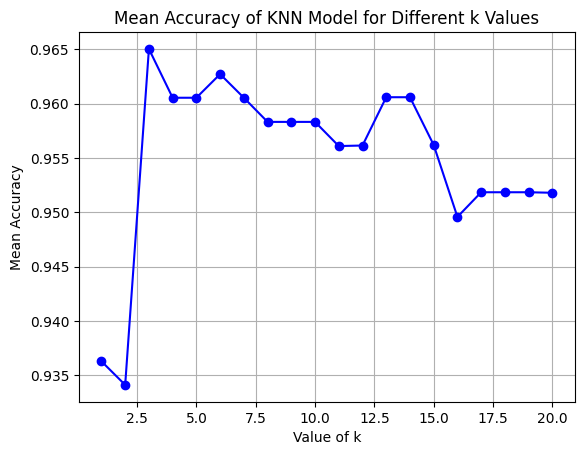

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=5)

cv = StratifiedKFold(n_splits=10)

accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    accuracy_scores.append(scores.mean())
    
plt.plot(k_values, accuracy_scores, marker='o', color='b', linestyle='-')
plt.xlabel('Value of k')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of KNN Model for Different k Values')
plt.grid(True)
plt.show()

**2.5. Precision and Recall and F1**

In [9]:
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best value of k: {best_k}")

best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train_scaled, y_train)

y_pred = best_knn_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nEvaluation Metrics for the Final Model with the Best k:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Best value of k: 3

Evaluation Metrics for the Final Model with the Best k:
Accuracy: 0.96
Precision: 0.95
Recall: 0.98
F1 Score: 0.97


**3.1. Discretise Continuous Features**

In [10]:
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
X_train_discretized = discretizer.fit_transform(X_train_scaled)
X_test_discretized = discretizer.transform(X_test_scaled)

**3.2. Decision Tree Classifier**

In [11]:
tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_features=None)

**3.3. Attempting Multiway Branching by Reducing Depth Restrictions**

In [12]:
multiway_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_features='sqrt')

**3.4. Cross-validation with binary branching**

In [20]:
cv = StratifiedKFold(n_splits=10)
binary_scores = cross_val_score(tree, X_train_discretized, y_train, cv=cv, scoring='accuracy')
multiway_scores = cross_val_score(multiway_tree, X_train_discretized, y_train, cv=cv, scoring='accuracy')

print("Cross-Validation Results:")
print(f"Binary Tree Average Accuracy: {binary_scores.mean():.2f}")
print(f"Multiway Tree Average Accuracy: {multiway_scores.mean():.2f}")

Cross-Validation Results:
Binary Tree Average Accuracy: 0.94
Multiway Tree Average Accuracy: 0.95


**3.5. Train and evaluate the binary tree on test data**

In [67]:
tree.fit(X_train_discretized, y_train)
y_pred_binary = tree.predict(X_test_discretized)
binary_accuracy = accuracy_score(y_test, y_pred_binary)

multiway_tree.fit(X_train_discretized, y_train)
y_pred_multiway = multiway_tree.predict(X_test_discretized)
multiway_accuracy = accuracy_score(y_test, y_pred_multiway)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nTest Set Evaluation:")
print(f"Binary Tree Test Accuracy: {binary_accuracy:.2f}")
print(f"Multiway Tree Test Accuracy: {multiway_accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Test Set Evaluation:
Binary Tree Test Accuracy: 0.93
Multiway Tree Test Accuracy: 0.95
Precision: 0.86
Recall: 1.00
F1 Score: 0.93


**4.1. Random Forest Classifier**

In [68]:
n_estimators_range = [10, 50, 100, 200]

cv = StratifiedKFold(n_splits=10)

accuracy_scores = []

for estimator in n_estimators_range:
    forest = RandomForestClassifier(criterion='gini', n_estimators=estimator, random_state=42)
    scores = cross_val_score(forest, X_train_discretized, y_train, cv=cv, scoring='accuracy')
    
    accuracy_scores.append(scores.mean())
    print(f"Random Forest with {estimator} trees - Cross-Validation Accuracy: {scores.mean():.2f}")
    
best_index = np.argmax(accuracy_scores)
best_n_estimators = n_estimators_range[best_index]
print(f"\nBest number of trees based on cross-validation: {best_n_estimators} with accuracy {accuracy_scores[best_index]:.2f}")

best_rf_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

y_pred = best_rf_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nTest Set Accuracy for Random Forest with {best_n_estimators} trees: {test_accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Random Forest with 10 trees - Cross-Validation Accuracy: 0.95
Random Forest with 50 trees - Cross-Validation Accuracy: 0.96
Random Forest with 100 trees - Cross-Validation Accuracy: 0.95
Random Forest with 200 trees - Cross-Validation Accuracy: 0.96

Best number of trees based on cross-validation: 50 with accuracy 0.96

Test Set Accuracy for Random Forest with 50 trees: 0.96
Precision: 0.98
Recall: 0.94
F1 Score: 0.96


**5.1. Gaussian Naive Bayse Classifier**

In [63]:
gnb = GaussianNB()

cv = StratifiedKFold(n_splits=10)
cv_scores_gnb = cross_val_score(gnb, X_train_discretized, y_train, cv=cv, scoring='accuracy')

print(f"Gaussian Naive Bayes - Cross-Validation Accuracy: {cv_scores_gnb.mean():.2f}")

gnb.fit(X_train_discretized, y_train)
y_pred = gnb.predict(X_test_discretized)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Gaussian Naive Bayes - Cross-Validation Accuracy: 0.92
Accuracy: 0.91
Precision: 0.86
Recall: 1.00
F1 Score: 0.93


**6. Compare Cross-Validation and Show in Diagram**

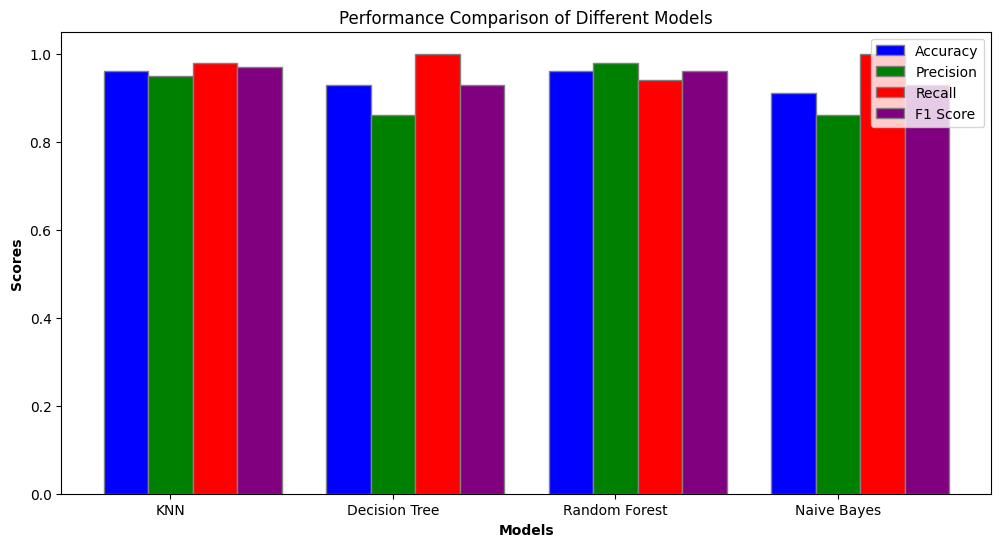

In [69]:
import matplotlib.pyplot as plt
import numpy as np

models = ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']

accuracy = [0.96, 0.93, 0.96, 0.91]
precision = [0.95, 0.86, 0.98, 0.86]
recall = [0.98, 1.00, 0.94, 1.00]
f1_score = [0.97, 0.93, 0.96, 0.93]

barWidth = 0.2

r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.figure(figsize=(12, 6))
plt.bar(r1, accuracy, color='b', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='g', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='r', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, color='purple', width=barWidth, edgecolor='grey', label='F1 Score')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Performance Comparison of Different Models')
plt.xticks([r + barWidth for r in range(len(models))], models)

plt.legend()

plt.show()